## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/datasets


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cpu CPU (Intel Xeon 2.00GHz)
Setup complete ✅ (96 CPUs, 334.6 GB RAM, 15.8/225.3 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

In [ ]:
'''!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZDnSOEiUWZ7UUGTGbhnF")
project = rf.workspace("tarek-orjzx").project("p2m-tunisian-burned-area")
version = project.version(2)
dataset = version.download("yolov8")'''


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZDnSOEiUWZ7UUGTGbhnF")
project = rf.workspace("tarek-orjzx").project("p2m-mom9z")
version = project.version(4)
dataset = version.download("yolov8")

/content/datasets/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to p2m-4 in yolov8:: 100%|██████████| 6036/6036 [00:00<00:00, 6897.53it/s]


## Custom Training

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=5 imgsz=800 plots=True

New https://pypi.org/project/ultralytics/8.2.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/p2m-tunisian-burned-area-2/data.yaml, epochs=5, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=F

In [ ]:
!ls {HOME}/runs/detect/train/

ls: cannot access '{HOME}/runs/detect/train/': No such file or directory


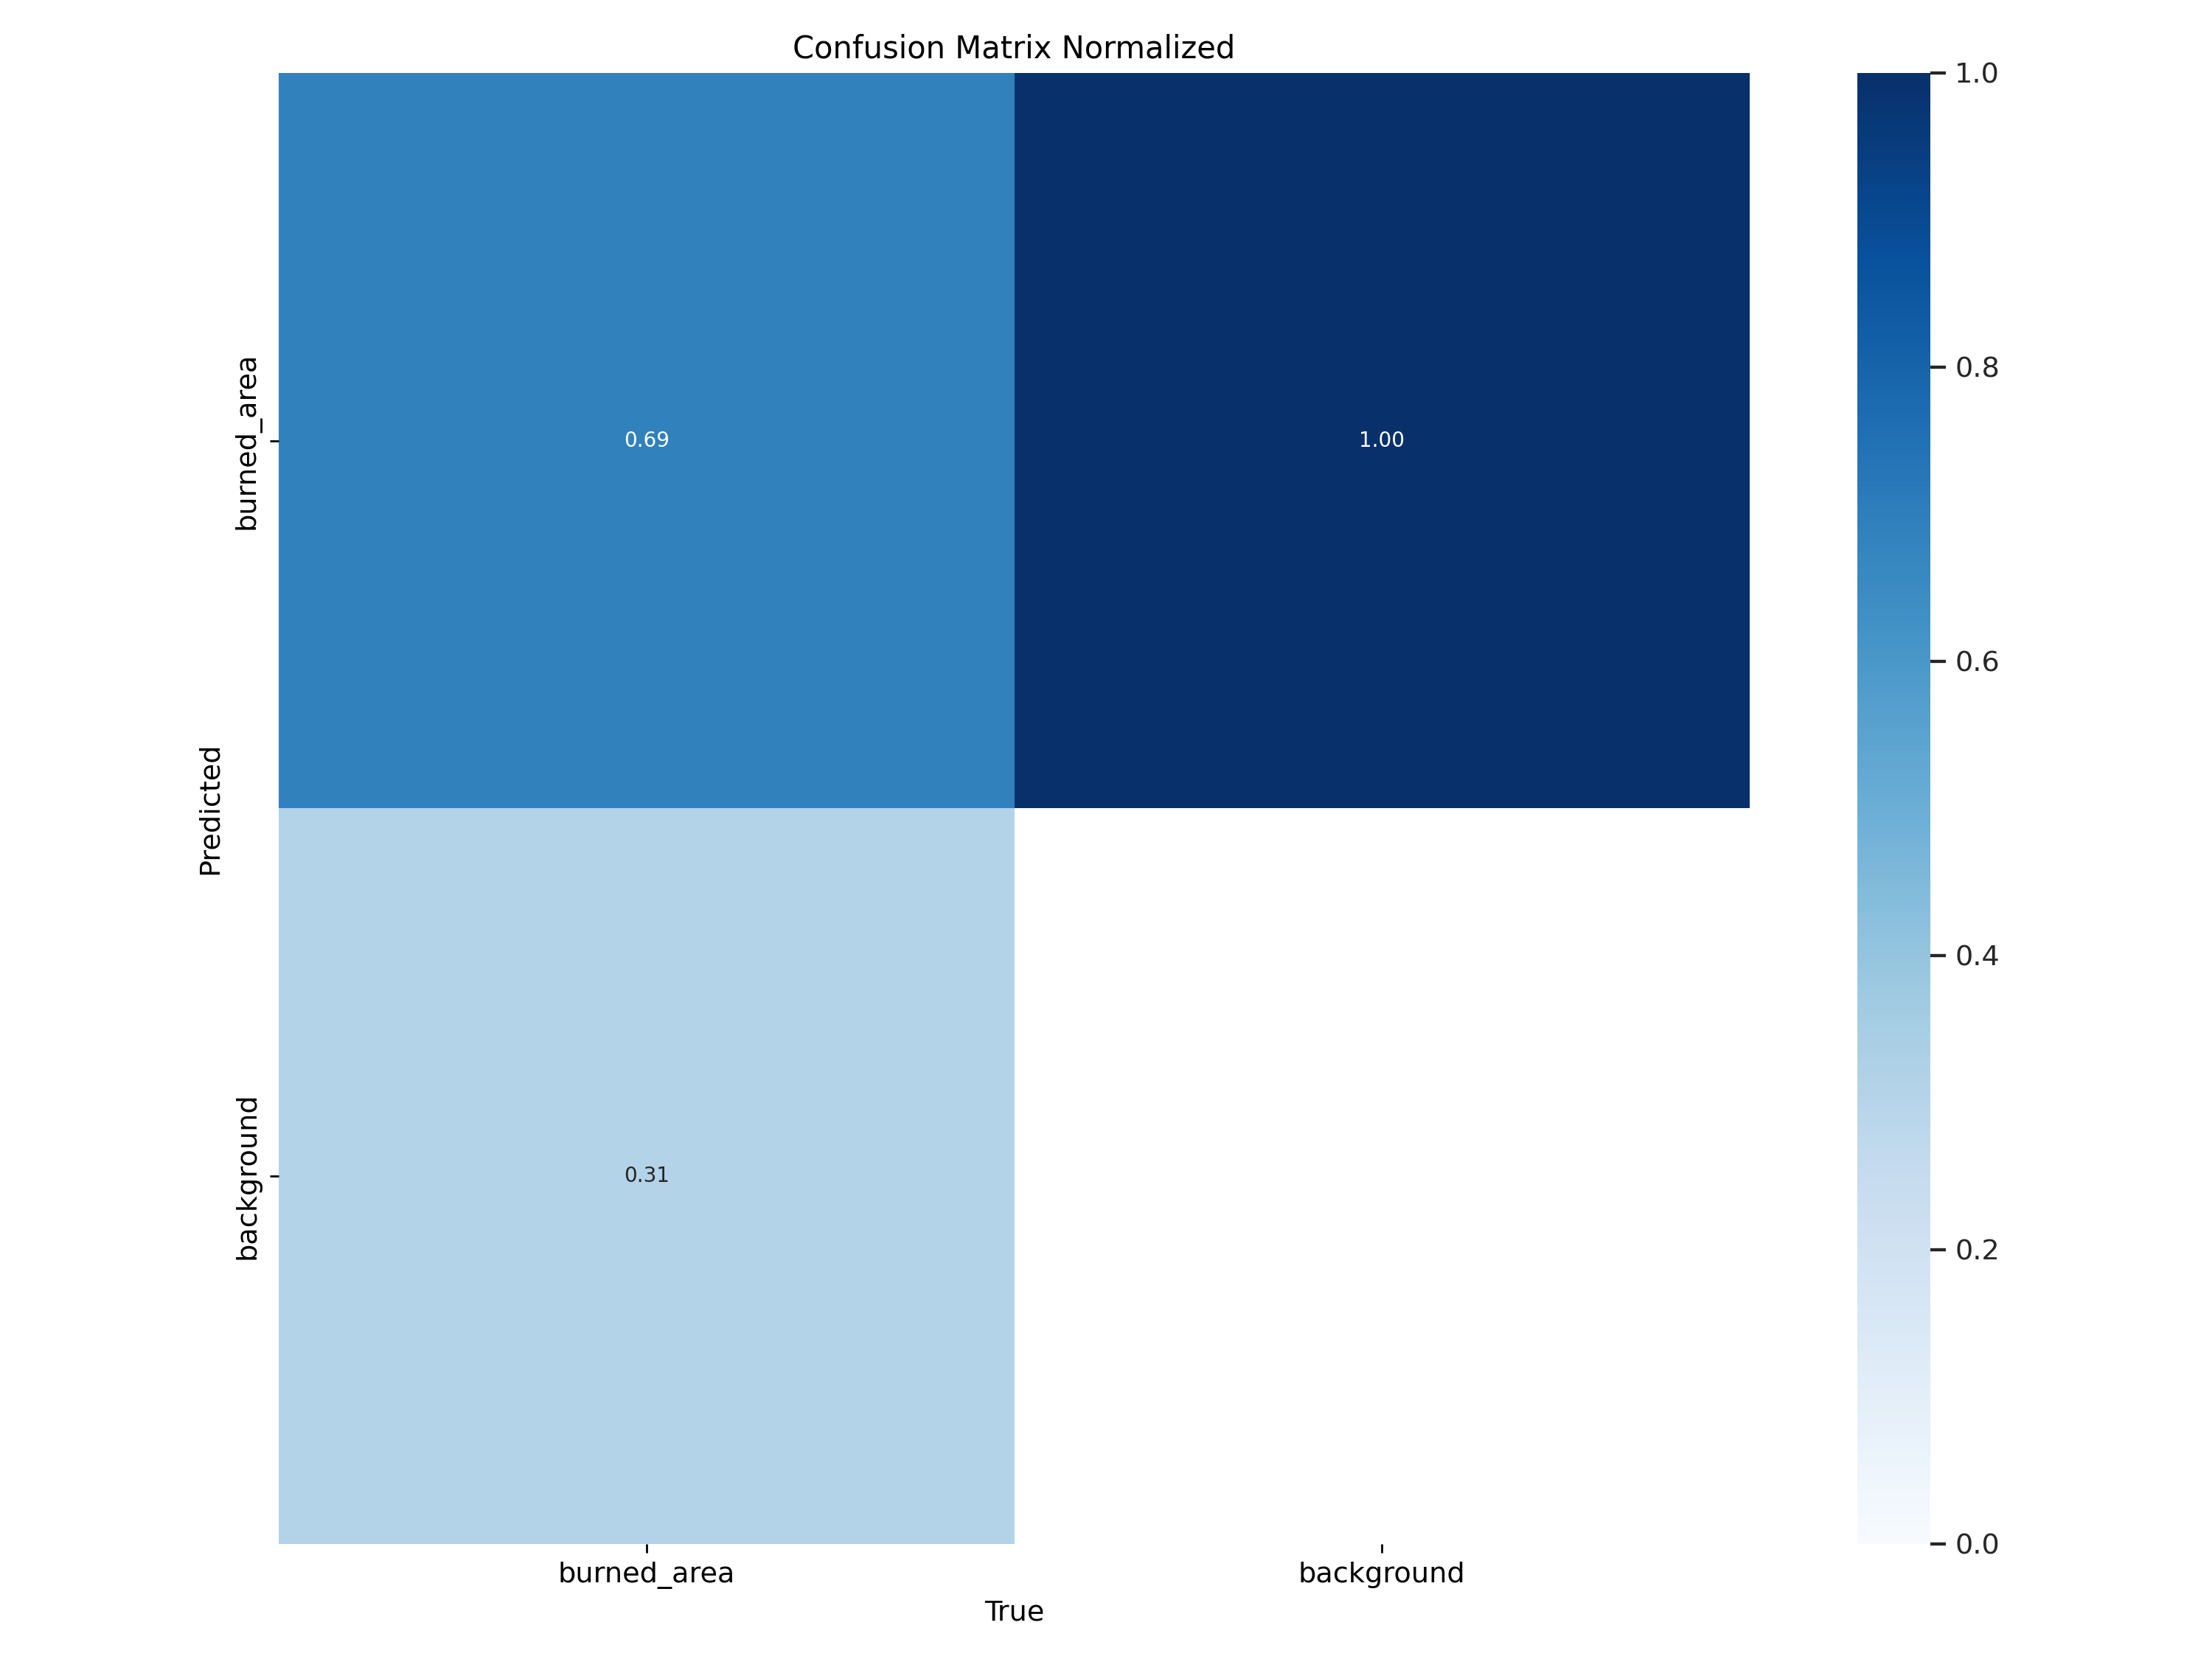

In [ ]:
Image(filename='/kaggle/working/runs/detect/train/confusion_matrix_normalized.png', width=600)

[Errno 2] No such file or directory: '{HOME}'
/kaggle/working


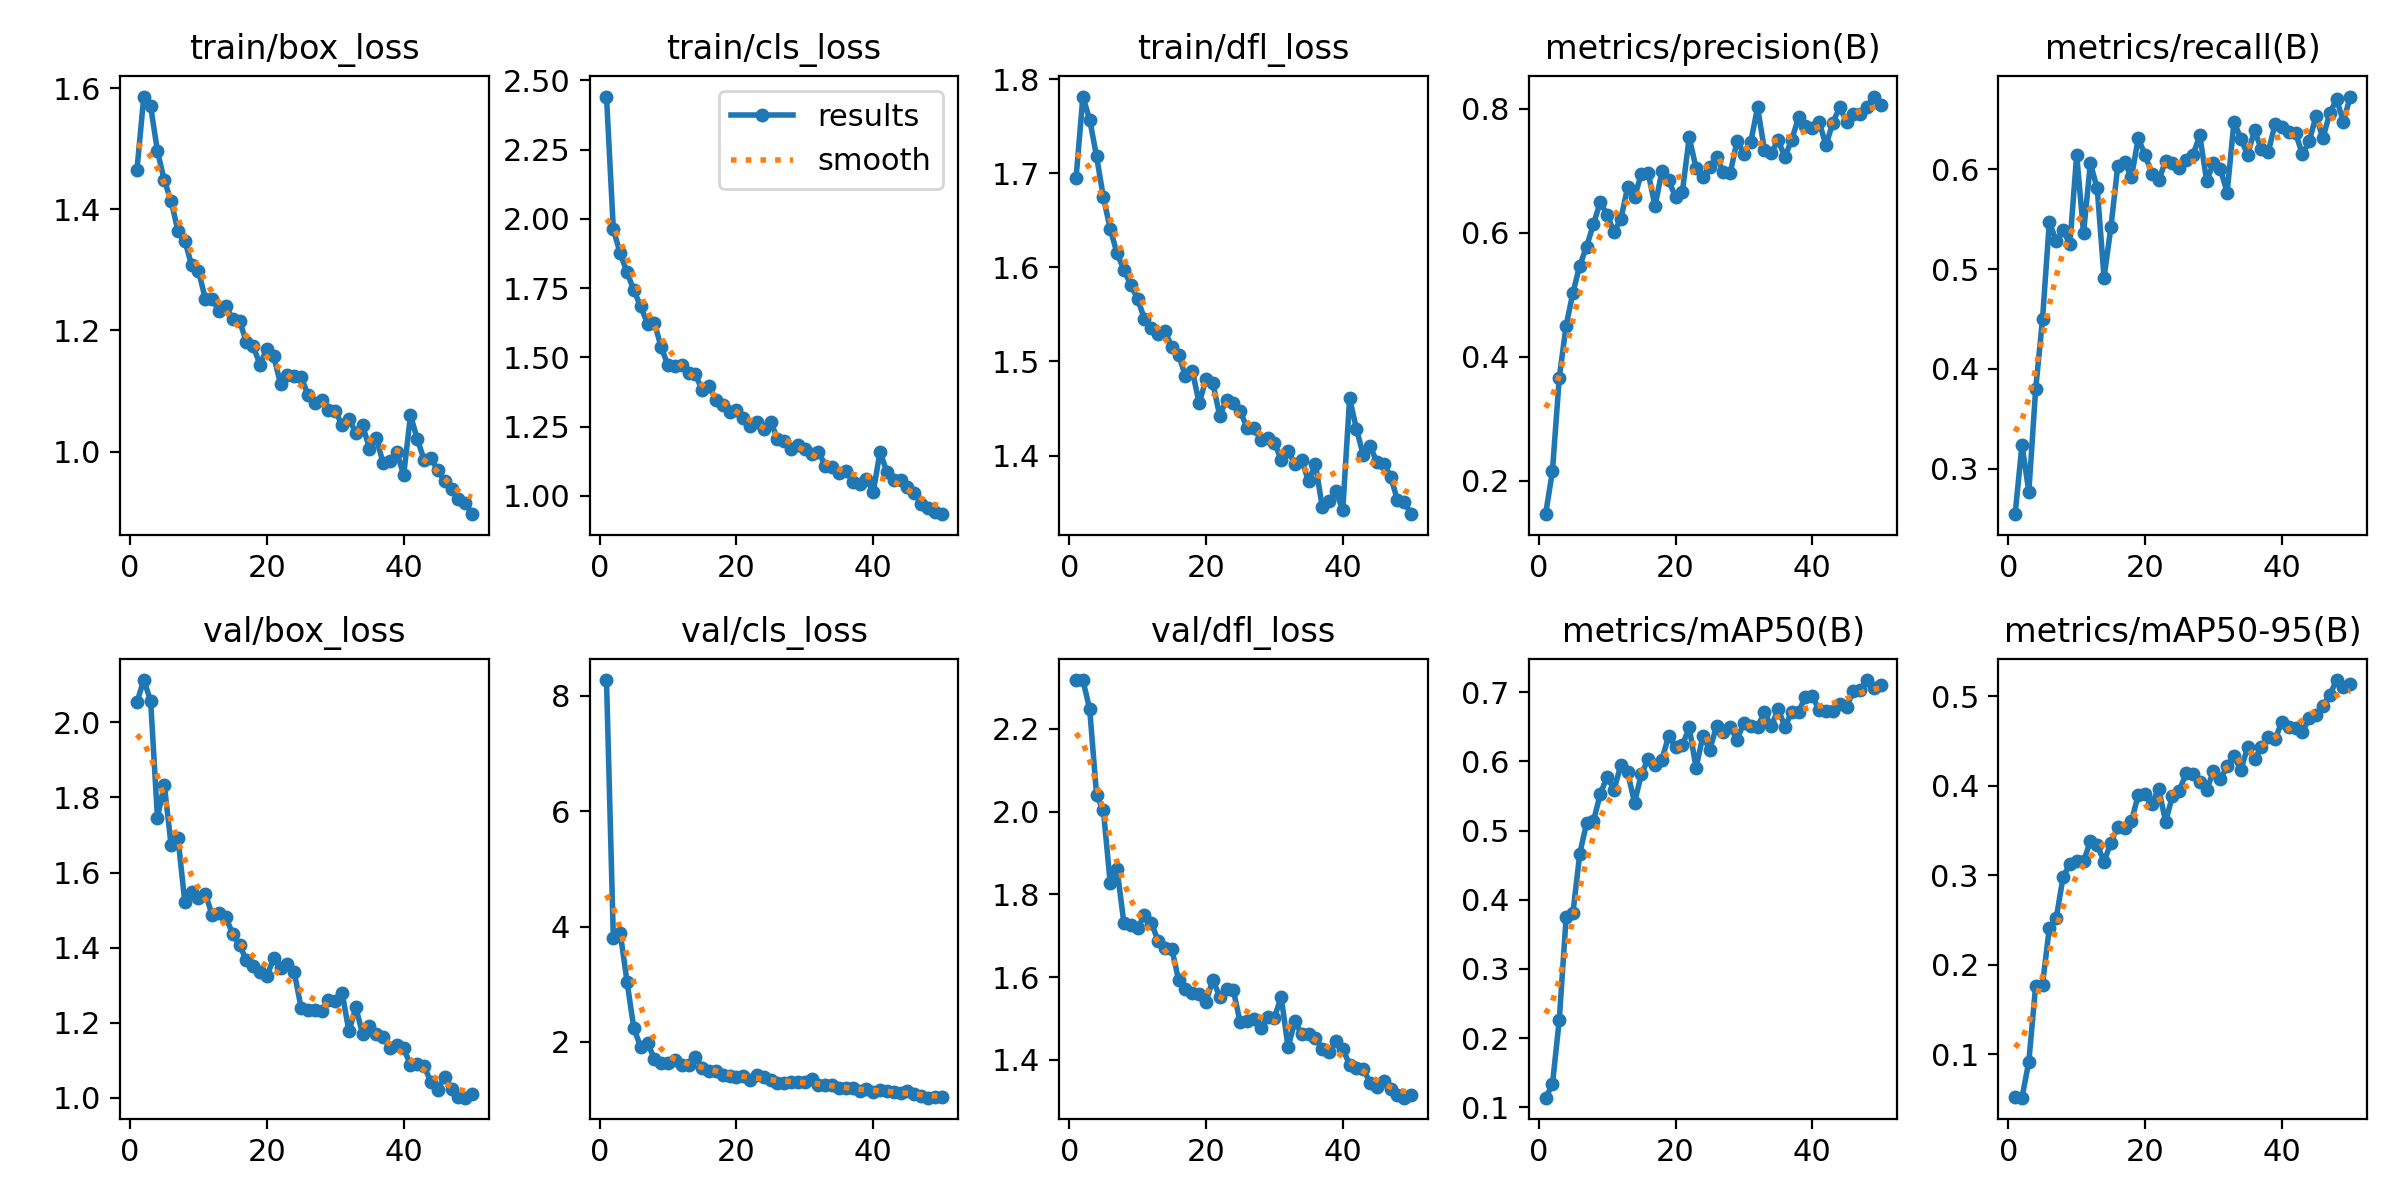

In [ ]:
%cd {HOME}
Image(filename='/kaggle/working/runs/detect/train/results.png', width=600)

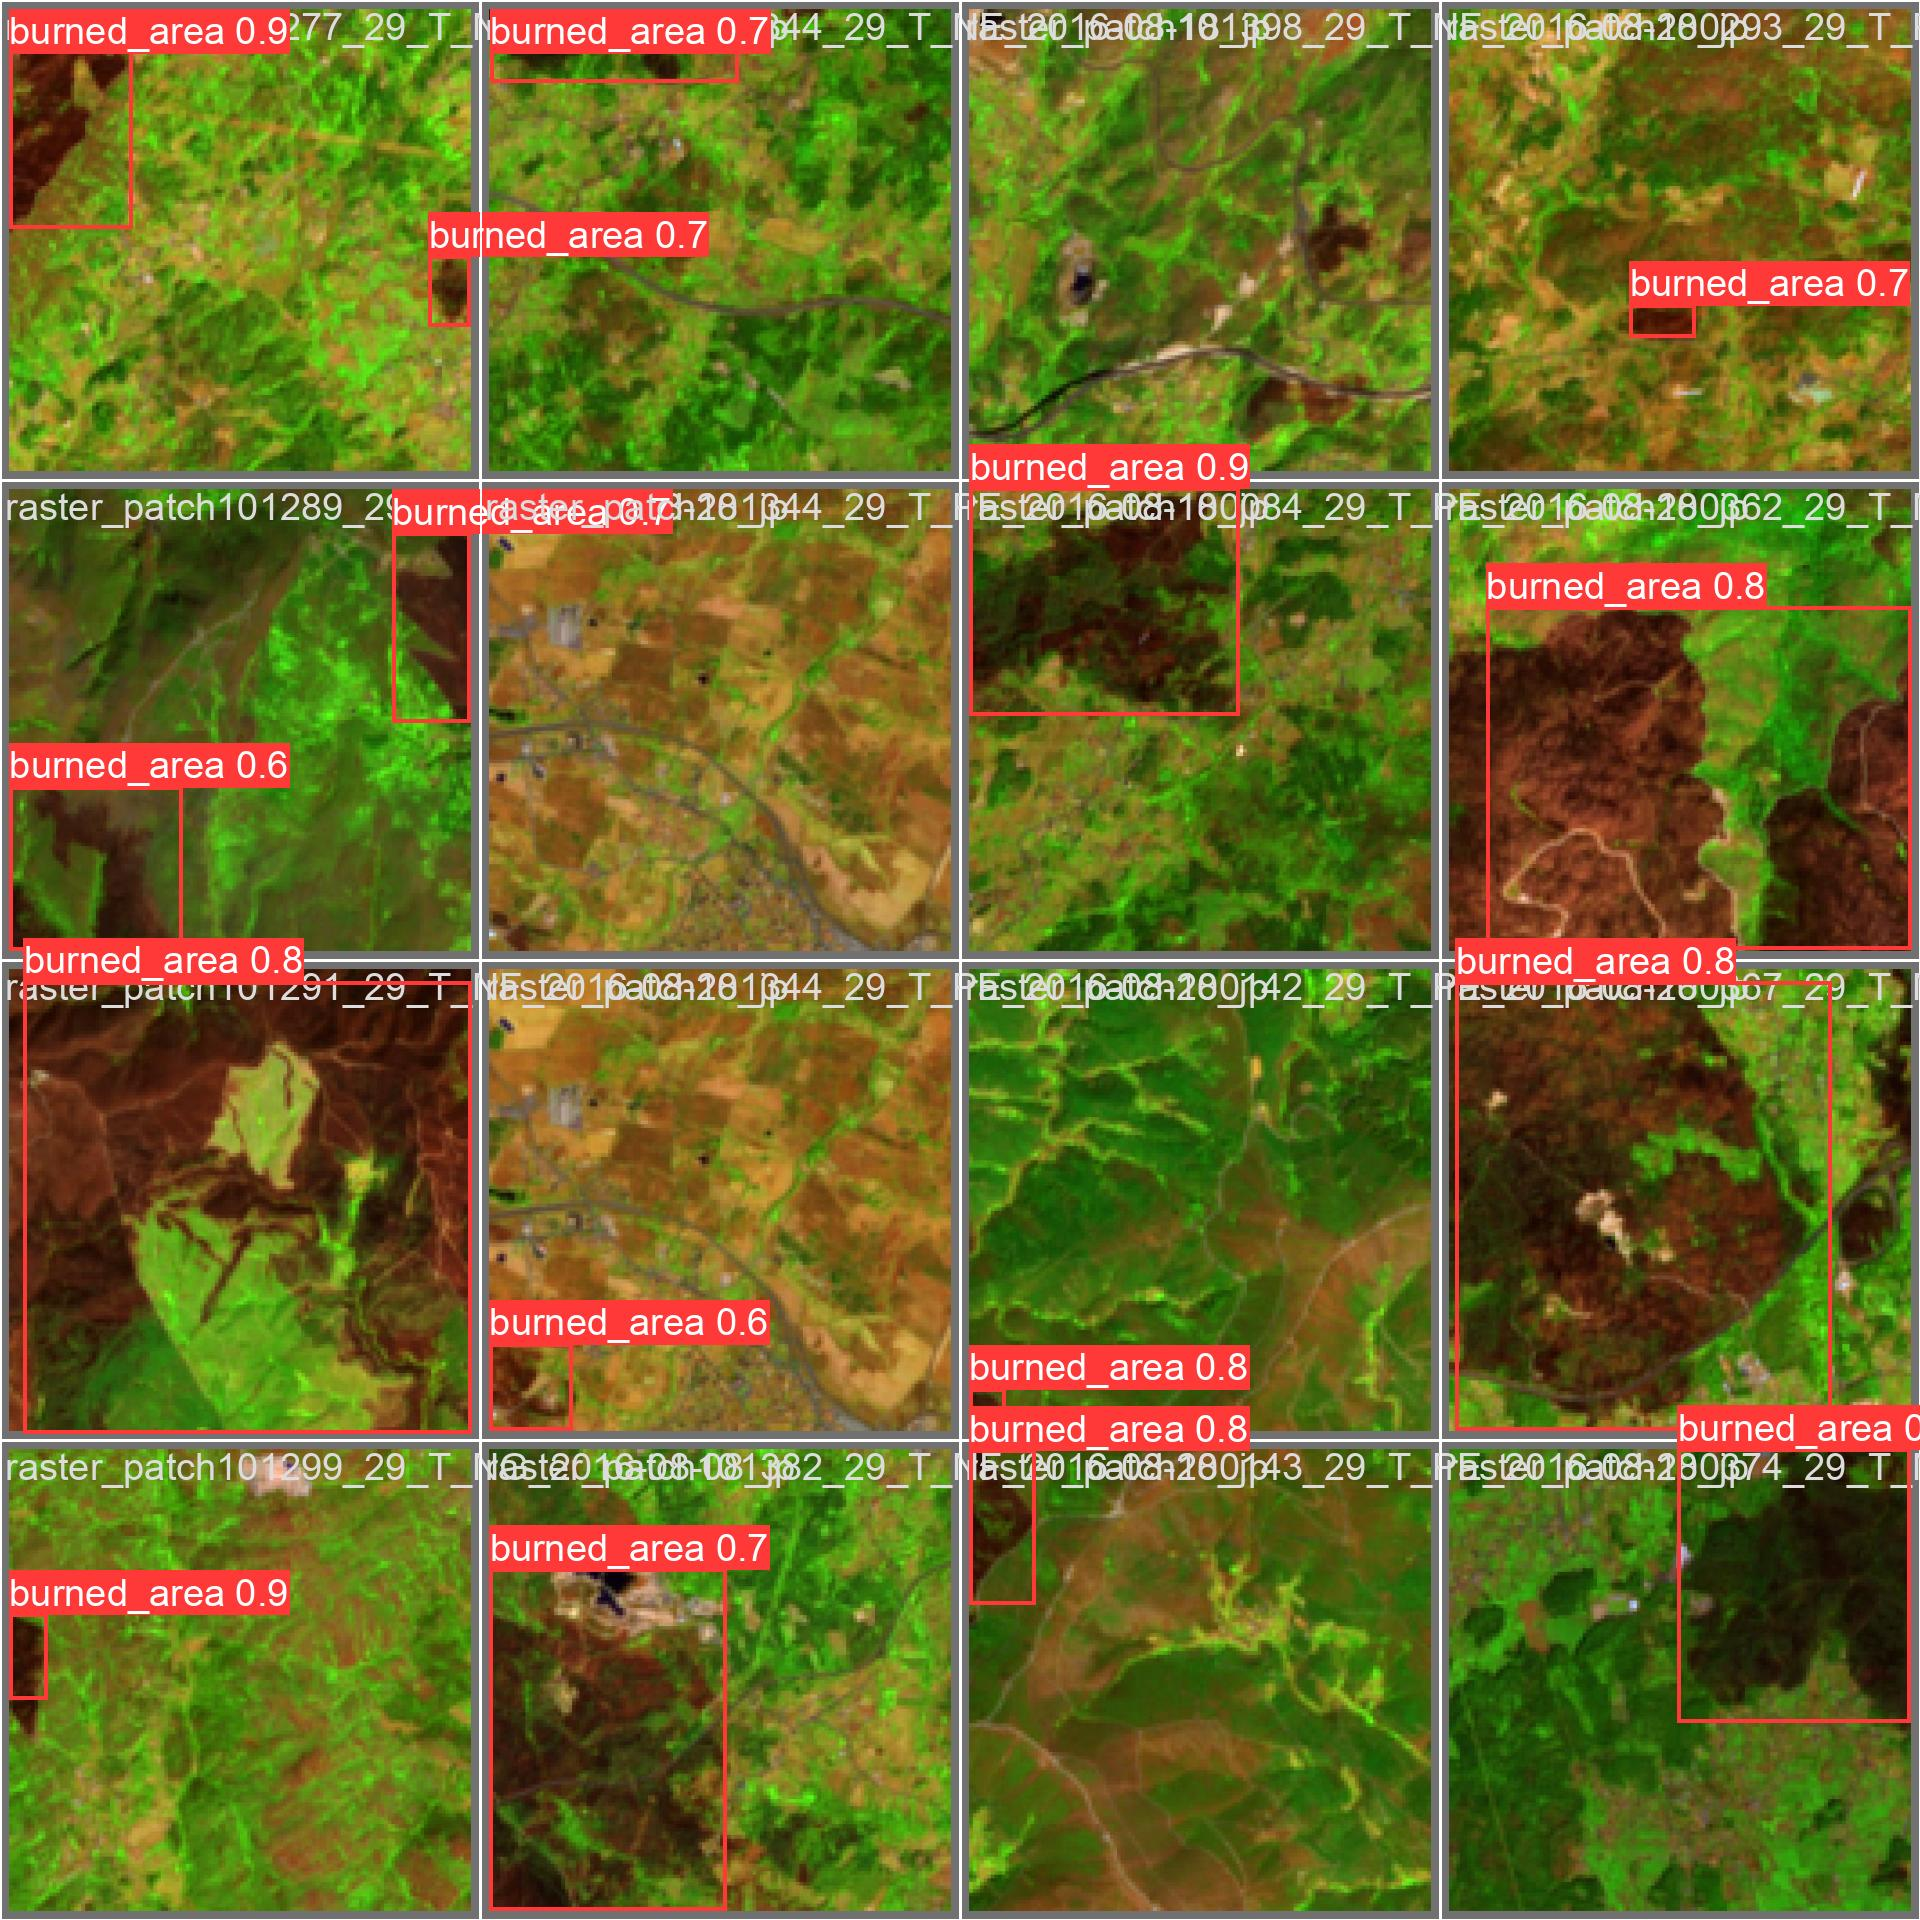

In [ ]:
Image(filename='/kaggle/working/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=/content/best.pt data=/content/datasets/datasets/p2m-4/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cpu CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/datasets/p2m-4/valid/labels... 251 images, 0 backgrounds, 0 corrupt: 100% 251/251 [00:00<00:00, 968.29it/s]
val: WARNING ⚠️ /content/datasets/datasets/p2m-4/valid/images/raster_patch100544_29_T_NE_2016-08-18_jpg.rf.ed93981d0c1c9d7665f1d55889a5ac6b.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/datasets/datasets/p2m-4/valid/images/raster_patch100544_29_T_NE_2016-08-28_jpg.rf.ecc4970f424061c16d888c72feec3f80.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/datasets/datasets/p2m-4/valid/images/raster_patch101398_29_T_NF_2016-08-28_jpg.rf.ca0902149e2de343cccbd987394bbc2e.jpg: 2 duplicate labels removed
val: New cache created: /content/datasets/datasets/p2m-4/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [00

## Inference with Custom Model

In [ ]:
!yolo task=detect mode=predict model=/content/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cpu CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/127 /content/datasets/datasets/p2m-4/test/images/raster_patch100099_29_T_PE_2016-08-28_jpg.rf.82100ee84cb8b11d12711820568746e5.jpg: 800x800 1 burned_area, 131.9ms
image 2/127 /content/datasets/datasets/p2m-4/test/images/raster_patch100100_29_T_PE_2016-08-28_jpg.rf.188d138b28285893b88c71c9102da778.jpg: 800x800 1 burned_area, 82.2ms
image 3/127 /content/datasets/datasets/p2m-4/test/images/raster_patch100123_29_T_PF_2016-08-28_jpg.rf.fa112b507daa97766b684a48550d3e4d.jpg: 800x800 1 burned_area, 81.0ms
image 4/127 /content/datasets/datasets/p2m-4/test/images/raster_patch100296_29_T_PE_2016-08-18_jpg.rf.85ba4ca1662fde975fa0d545f48ad002.jpg: 800x800 1 burned_area, 84.2ms
image 5/127 /content/datasets/datasets/p2m-4/test/images/raster_patch100321_29_T_NG_2016-08-21_jpg.rf.e2f54954ad7670ae7311df28a76b4378.jpg: 800x800 2 burn

**NOTE:** Let's take a look at few results.

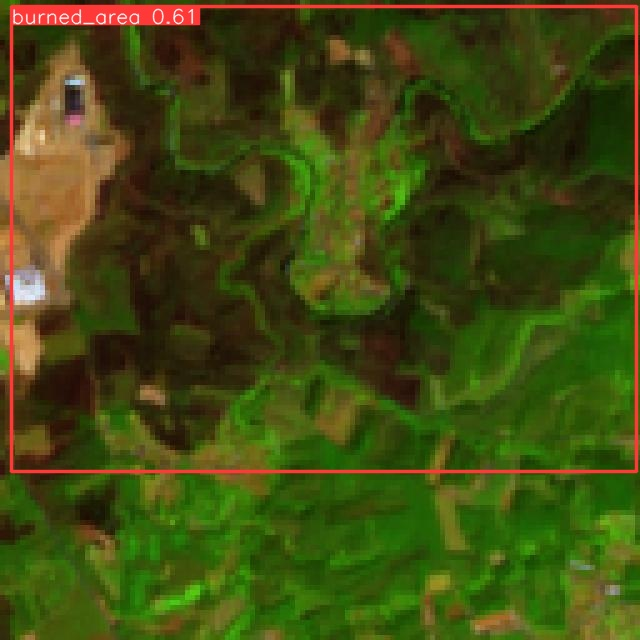

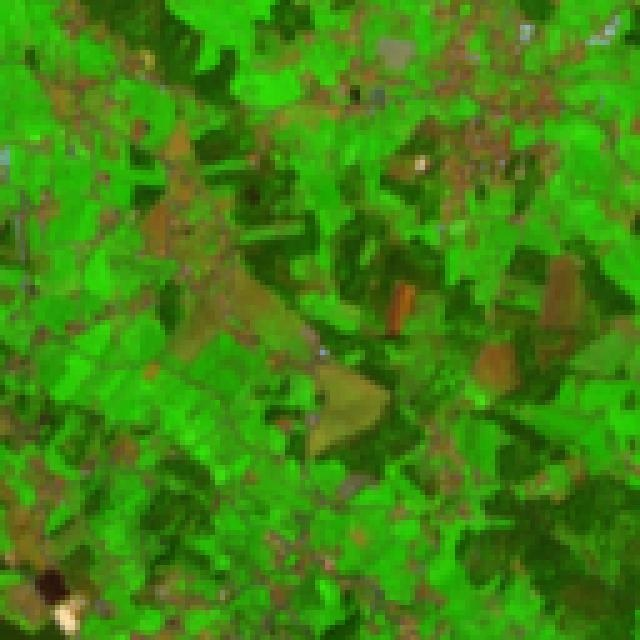

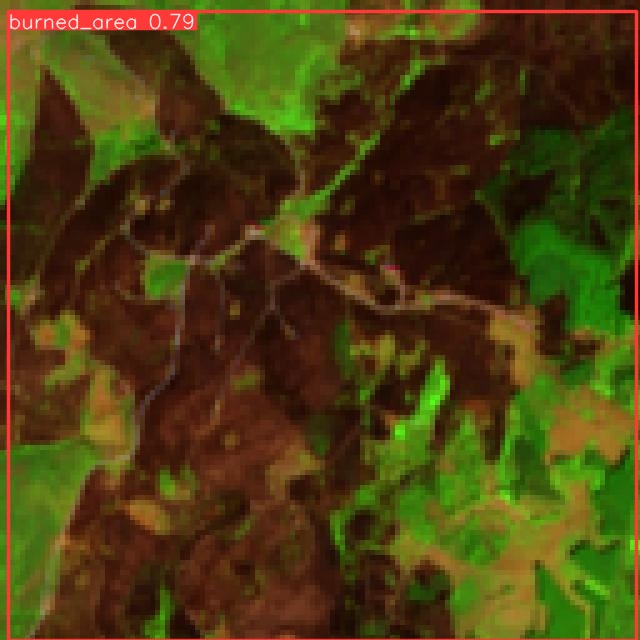

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

In [ ]:
from PIL import Image
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO('/content/best.pt')

# Run inference on 'bus.jpg'
results = model(['/content/raster_patch100320_29_T_NG_2016-08-21.jpg'])  # results list



0: 800x800 2 burned_areas, 107.3ms
Speed: 5.2ms preprocess, 107.3ms inference, 1.3ms postprocess per image at shape (1, 3, 800, 800)


In [ ]:
!pip install -U ultralytics

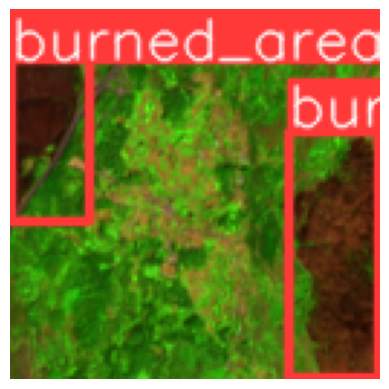

In [ ]:
import matplotlib.pyplot as plt

# Visualize the results
for i, r in enumerate(results):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    plt.imshow(im_rgb)
    plt.axis('off')  # Turn off axis
    plt.show()